In [1]:
! pip install segmentation_models
! pip install albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 22.1 MB/s eta 0:00:0000:0100:01


In [2]:
# Model stuff
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.utils import normalize
import segmentation_models as sm
from sklearn.model_selection import train_test_split
import model_utility
import os

#path sorting
import glob
import cv2
from pathlib import Path
import re

#math
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Segmentation Models: using `keras` framework.


# What are we doing today?

In [3]:
model_path = "models/dark/"
type = "darkGB_Callback"
training_size = "360"
epoch_num = "1000"
backbone = "resnet34"

model_path = f"{model_path}{type}_spoke_{training_size}im_{epoch_num}e_{backbone}.h5"

# Create training data

In [4]:
X, Y = [], []

X, Y = model_utility.data_gather(X, Y, "dark_spokes_training_images", "dark_spokes_training_masks", aug_flag = 1, aug_num = 5)

Compose([
  GaussianBlur(always_apply=False, p=0.5, blur_limit=(11, 13), sigma_limit=(0, 0)),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}, is_check_shapes=True)
360 360


In [5]:
X = normalize(np.array(X), axis=1)
Y = (np.array(Y))/255.

# train/test split test_size = .15 for light, .25 for dark(no agu)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)

SIZE_Y, SIZE_X = X.shape[1], X.shape[2]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(306, 160, 736)
(54, 160, 736)
(306, 160, 736)
(54, 160, 736)


In [6]:
model = model_utility.define_model(SIZE_Y, SIZE_X, backbone)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 160, 736, 1  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 160, 736, 1)  3           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 166, 742, 1)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)                 (None, 80, 368, 64)  3136        ['zero_padding2d[0][0]']   

In [7]:
history = model_utility.fit_model(x_train, y_train, model, model_path, batch_size = 10, epochs = int(epoch_num), validation_split = .13)

Epoch 1/1000
27/27 [==============================] - ETA: 0s - loss: 0.4477 - iou_score: 0.0759
Epoch 1: val_iou_score improved from -inf to 0.04306, saving model to models/dark/darkGB_Callback_spoke_360im_1000e_resnet34.h5
27/27 [==============================] - 25s 400ms/step - loss: 0.4477 - iou_score: 0.0759 - val_loss: 14.5736 - val_iou_score: 0.0431
Epoch 2/1000
27/27 [==============================] - ETA: 0s - loss: 0.1830 - iou_score: 0.1362
Epoch 2: val_iou_score improved from 0.04306 to 0.04380, saving model to models/dark/darkGB_Callback_spoke_360im_1000e_resnet34.h5
27/27 [==============================] - 8s 286ms/step - loss: 0.1830 - iou_score: 0.1362 - val_loss: 14.2488 - val_iou_score: 0.0438
Epoch 3/1000
27/27 [==============================] - ETA: 0s - loss: 0.1210 - iou_score: 0.2097
Epoch 3: val_iou_score improved from 0.04380 to 0.04748, saving model to models/dark/darkGB_Callback_spoke_360im_1000e_resnet34.h5
27/27 [==============================] - 8s 285ms/

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



27/27 [==============================] - ETA: 0s - loss: 0.0011 - iou_score: 0.9836
Epoch 272: val_iou_score did not improve from 0.98536
27/27 [==============================] - 7s 248ms/step - loss: 0.0011 - iou_score: 0.9836 - val_loss: 0.0014 - val_iou_score: 0.9798
Epoch 273/1000
27/27 [==============================] - ETA: 0s - loss: 8.8113e-04 - iou_score: 0.9865
Epoch 273: val_iou_score did not improve from 0.98536
27/27 [==============================] - 7s 247ms/step - loss: 8.8113e-04 - iou_score: 0.9865 - val_loss: 0.0010 - val_iou_score: 0.9838
Epoch 274/1000
27/27 [==============================] - ETA: 0s - loss: 8.2941e-04 - iou_score: 0.9876
Epoch 274: val_iou_score did not improve from 0.98536
27/27 [==============================] - 7s 247ms/step - loss: 8.2941e-04 - iou_score: 0.9876 - val_loss: 9.2944e-04 - val_iou_score: 0.9853
Epoch 275/1000
27/27 [==============================] - ETA: 0s - loss: 7.5707e-04 - iou_score: 0.9887
Epoch 275: val_iou_score improved 

# Plots

In [8]:
results = model.evaluate(x_test, y_test)

2/2 [==============================] - 4s 1s/step - loss: 3.2683e-05 - iou_score: 0.9997


In [9]:
model_utility.save_model_history(model_path, model, history, results)

Which model is this:  models/dark/darkGB_Callback_spoke_360im_1000e_resnet34


Which model is this? - darkGB_Callback_spoke_360im_1000e_resnet34.json


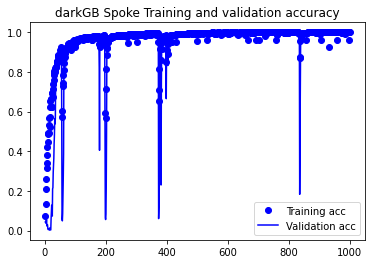

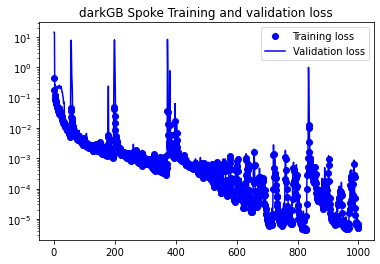

Last Train IOU Score:  0.999949038028717
Last Train Loss Score:  5.013506324758055e-06
Last Validation IOU Score:  0.9999402165412903
Last Validation Loss Score:  8.694821190147195e-06
darkGB_Callback
360
1000


In [10]:
model_utility.display_results(model_path)
print(type)
print(training_size)
print(epoch_num)

dict_keys(['loss', 'iou_score', 'val_loss', 'val_iou_score', 'eval_results'])


In [6]:
model_path = "models/aug/"
type = "darkGBAug"
training_size = "360"
epoch_num = "300"
backbone = "resnet34"

model_path = f"{model_path}{type}_spoke_{training_size}im_{epoch_num}e_{backbone}.h5"

In [11]:
from tensorflow import keras

model = keras.models.load_model(model_path, compile = False)
model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()], )

print(type)
print(training_size)
print(epoch_num)

darkGB_Callback
360
300


# testing with images outside of train/test(light)

The dark_spokes_no_training/ training set is made of 192 images
W1593676089.png 0


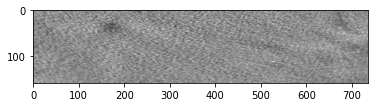

1/1 [==============================] - 1s 677ms/step


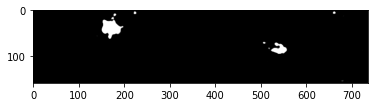

W1593678128.png 1


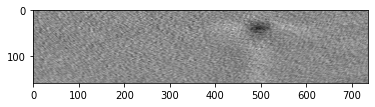

1/1 [==============================] - 0s 23ms/step


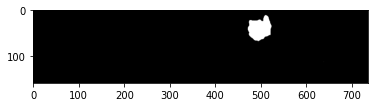

W1593680167.png 2


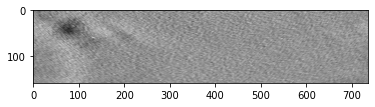

1/1 [==============================] - 0s 24ms/step


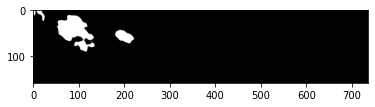

W1593682206.png 3


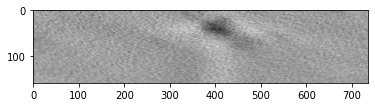

1/1 [==============================] - 0s 24ms/step


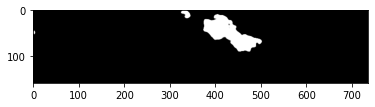

W1593684245.png 4


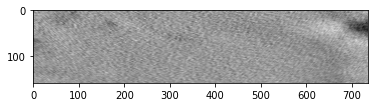

1/1 [==============================] - 0s 24ms/step


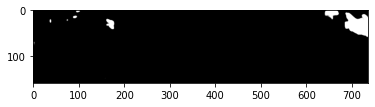

W1593686284.png 5


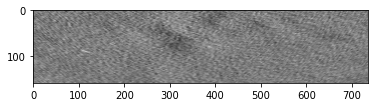

1/1 [==============================] - 0s 27ms/step


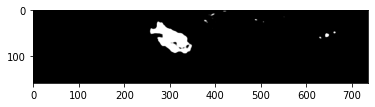

W1593688323.png 6


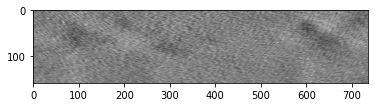

1/1 [==============================] - 0s 24ms/step


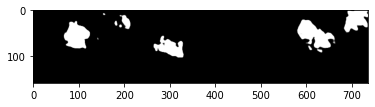

W1593690362.png 7


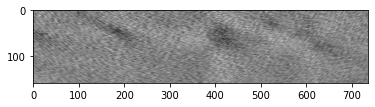

1/1 [==============================] - 0s 25ms/step


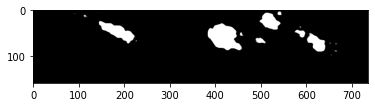

W1593692401.png 8


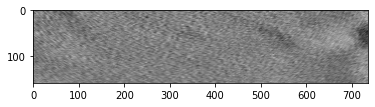

1/1 [==============================] - 0s 28ms/step


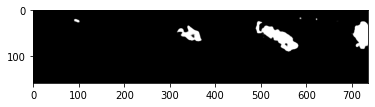

W1593696479.png 9


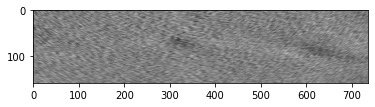

1/1 [==============================] - 0s 25ms/step


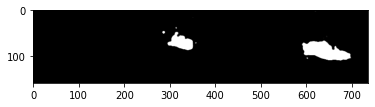

In [17]:
model_utility.model_testing(model, "dark", 10)